In [79]:
import sys
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.data_generator import generate_data
from src.clustering import OrdinalClustering, univariate_em, compute_loglikelihood, compute_p_list
from src.aecm import AECM_BOS, AECM_GOD

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BOS Distribution

[4 4 3 4 4 4 4 4 4 4 4 4 2 4 4 3 4 2 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 3
 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 2 4 4 2 4 4 4 1 4 4 4 4 4 4 4 4 4 4
 2 4 4 4 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4]
True mu: 4, True pi: 0.7586156243223572


  0%|          | 0/4 [00:00<?, ?it/s]

Estimated mu: 4, Estimated pi: 0.7860245246802342


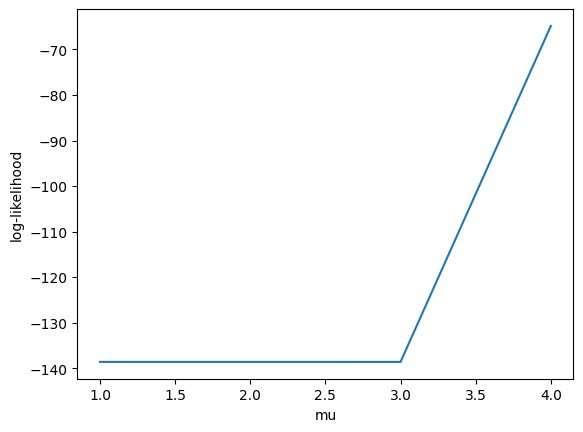

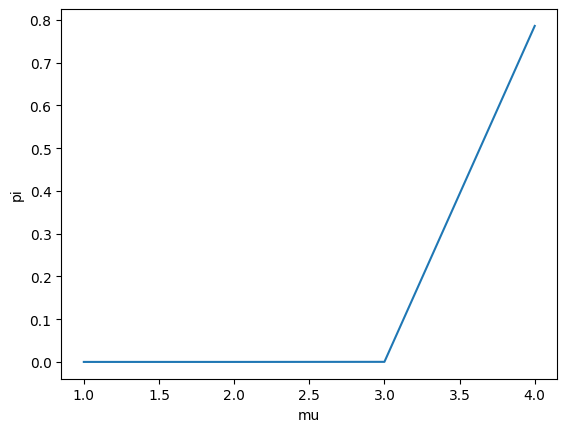

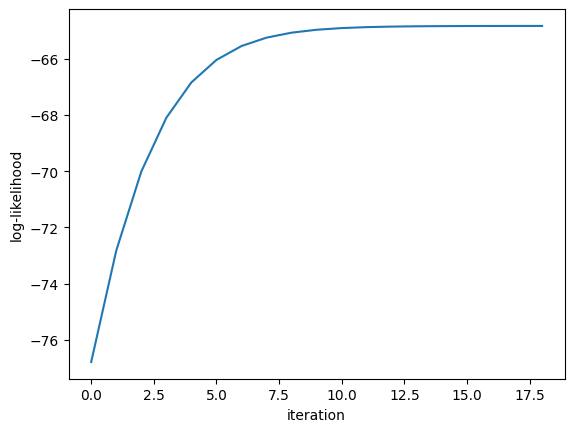

In [80]:
#Univariate
n = 100
m = 4
n_iter = 100
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

all_lls = []
ll_list = []
pi_list = []
mu_list = list(range(1, m + 1))
for mu in tqdm(mu_list):
    pl, lls, p_tots = univariate_em(data, m, mu, n_iter, eps)
    pi_list.append(pl[-1])
    ll_list.append(compute_loglikelihood(data, p_tots))
    all_lls.append(lls)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_list[np.argmax(ll_list)], pi_list[np.argmax(ll_list)]
    )
)

plt.plot(mu_list, ll_list)
plt.xlabel("mu")
plt.ylabel("log-likelihood")
plt.figure()
plt.plot(mu_list, pi_list)
plt.xlabel("mu")
plt.ylabel("pi")
plt.show()

plt.plot(all_lls[np.argmax(ll_list)])
plt.xlabel("iteration")
plt.ylabel("log-likelihood")
plt.show()


True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.38791074 0.66974604 0.93553907]
 [0.84631092 0.31327352 0.52454816]
 [0.44345289 0.22957721 0.53441391]]
Iteration 0
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Current alpha: [0.33333333 0.33333333 0.33333333]
Log-likelihood: -359.8140276542359
Iteration 1
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.75306383 0.36078489 0.83389496]
 [0.74244983 0.65416708 0.37985598]
 [0.00936346 0.00825596 0.58513103]]
Current alpha: [0.28308149 0.11821236 0.59870615]
Log-likelihood: -285.60680169935665
Iteration 2
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.59843738 0.36278324 0.82925337]
 [0.82581539 0.68170148 0.25272645]
 [0.11318413 0.01249338 0.7520116 ]]
Current alpha: [0.2384502  0.11643854 0.645

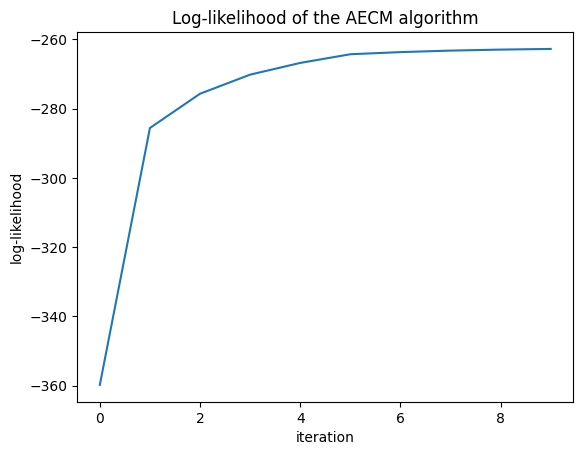

CPU times: user 1min 32s, sys: 240 ms, total: 1min 32s
Wall time: 1min 32s


In [32]:
%%time
# Multivariate
n = 100

d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.38791074 0.66974604 0.93553907]
 [0.84631092 0.31327352 0.52454816]
 [0.44345289 0.22957721 0.53441391]]
Random initialization
--------------------
Initial mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Initial pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Initial log likelihood: -359.8140276542359
Iteration 1
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.75306383 0.36078489 0.83389496]
 [0.74244983 0.65416708 0.37985598]
 [0.44092011 0.1939738  0.58513103]]
Current alpha: [0.28308149 0.11821236 0.59870615]
Log likelihood: -273.21953854198995
Iteration 2
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.6897594  0.37729854 0.81948086]
 [0.76507781 0.71090903 0.32453901]
 [0.49626406 0.23832132 0.73418817]]
Current alpha: [0.25238362 0.0959415  0.65167488]
Log likelihood: -265.9283

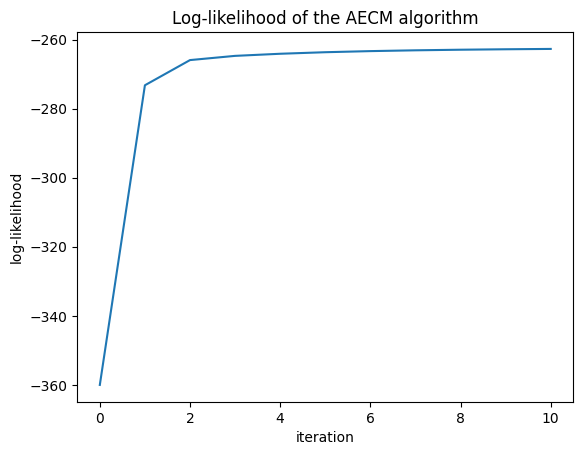

CPU times: user 1.41 s, sys: 140 ms, total: 1.55 s
Wall time: 1.38 s


In [34]:
%%time
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

# clustering = AECM_BOS(nb_clusters=n_clusters, n_iter=n_iter, eps=eps, silent=False)
clustering = AECM_BOS(nb_clusters=n_clusters,
                      nb_features=d,
                      ms=m,
                      data=data[0],
                      verbose=True)
                      
ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter)

labels = clustering.labels

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        clustering.alphas, clustering.mus, clustering.pis
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.2287124489114777
True mu: [2 1 1]
Estimated mu: [1 2 1]
True pi: [0.38791074 0.66974604 0.93553907]
Estimated pi: [0.67280861 0.5349704  0.59530338]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.09642623200104312
True mu: [2 2 1]
Estimated mu: [2 2 3]
True pi: [0.84631092 0.31327352 0.52454816]
Estimated pi: [0.91940709 0.82158937 0.25546859]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.6748613190874795
True mu: [1 2 1]
Estimated mu: [2 1 1]
True pi: [0.44345289 0.22957721 0.53441391]
Estimated pi: [0.47887206 0.3079188  0.84076895]


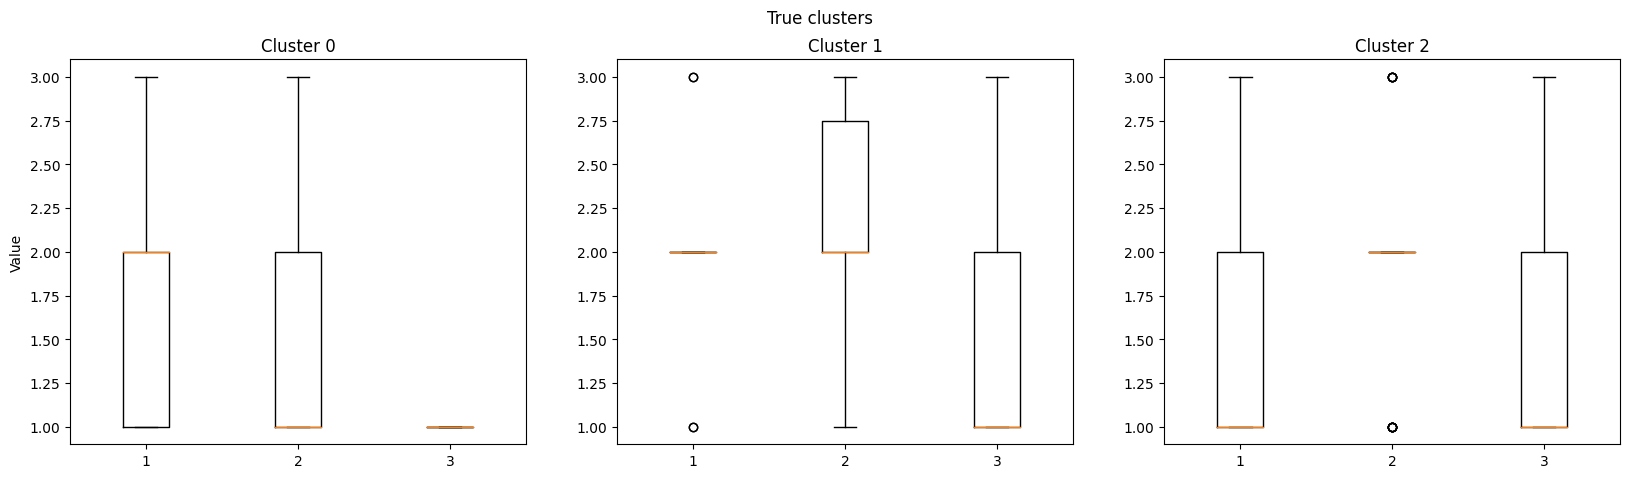

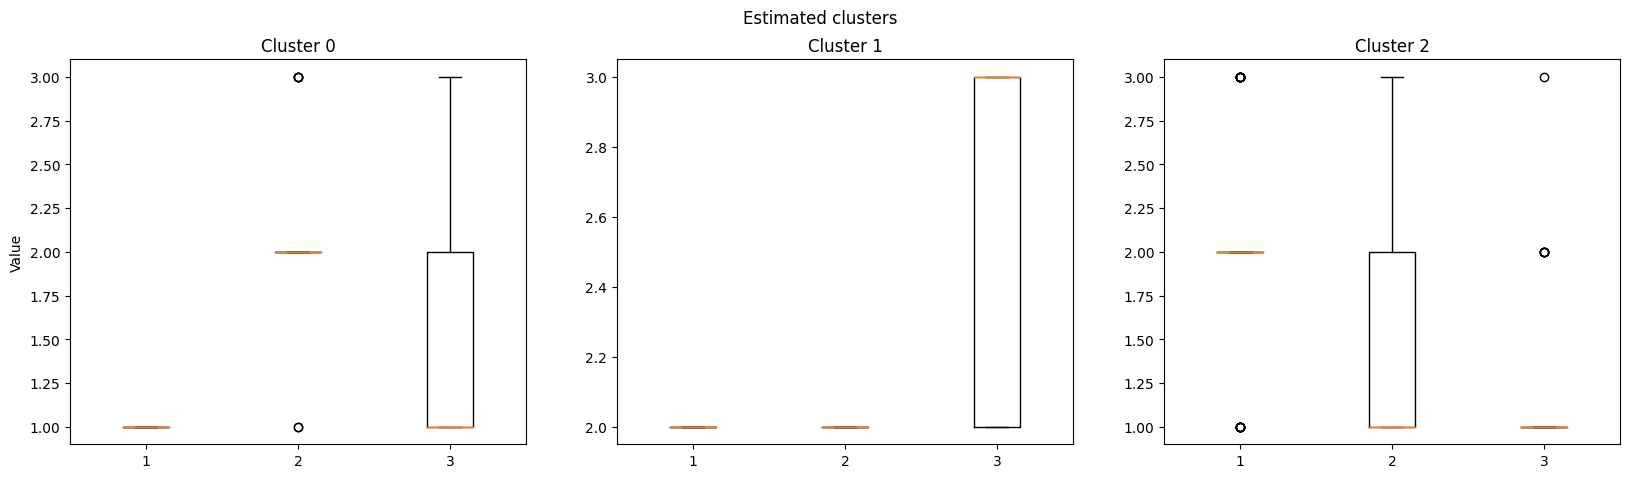

In [35]:
import pandas as pd

#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [47]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

inits = ["random", "kmeans"]

scores = defaultdict(list)

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = np.random.random((nc, dim))
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                    clustering = OrdinalClustering(nc, model="bos", init=init, n_iter=n_iter, eps=eps)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")


scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_bos.csv", index=False)

1/32 done in 3.80s
Estimated time left: 117.82s
2/32 done in 6.93s
Estimated time left: 104.01s
3/32 done in 28.40s
Estimated time left: 274.56s
4/32 done in 138.27s
Estimated time left: 967.91s
5/32 done in 144.27s
Estimated time left: 779.07s
6/32 done in 155.29s
Estimated time left: 672.91s
7/32 done in 229.51s
Estimated time left: 819.67s
8/32 done in 428.71s
Estimated time left: 1286.12s
9/32 done in 431.06s
Estimated time left: 1101.61s
10/32 done in 435.15s
Estimated time left: 957.33s
11/32 done in 502.01s
Estimated time left: 958.39s
12/32 done in 747.64s
Estimated time left: 1246.06s
13/32 done in 756.21s
Estimated time left: 1105.23s
14/32 done in 791.38s
Estimated time left: 1017.49s
15/32 done in 921.00s
Estimated time left: 1043.80s
16/32 done in 1321.34s
Estimated time left: 1321.34s
17/32 done in 1321.69s
Estimated time left: 1166.19s
18/32 done in 1322.16s
Estimated time left: 1028.35s
19/32 done in 1328.90s
Estimated time left: 909.25s
20/32 done in 1343.14s
Estimated

In [48]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_bos", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\centering
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_bos}
\begin{tabular}{lllllrrr}
\toprule
       &     &   &   &   &  $\Delta \alpha$ &  $\Delta \mu$ &  $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &                  &               &               \\
\midrule
kmeans & 50  & 3 & 3 & 2 &            0.277 &         0.333 &         0.296 \\
       &     &   &   & 3 &            0.269 &         0.444 &         0.217 \\
       &     &   & 5 & 2 &            0.062 &         0.200 &         0.208 \\
       &     &   &   & 3 &            0.063 &         0.267 &         0.118 \\
  

/tmp/ipykernel_22975/846471378.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(scores_short.to_latex(caption=caption, float_format="%.3f",


$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.276523      0.333333   
                              3                  0.268653      0.444444   
                          5   2                  0.061889      0.200000   
                              3                  0.062814      0.266667   
           5              3   2                  0.087662      0.666667   
                              3                  0.146980      0.555556   
                          5   2                  0.154990      0.400000   
                              3                  0.174077      0.333333   
       250 3              3   2                  0.111190      0.166667   
                              3                  0.129453      0.222222   
                          5   2                  0.140703      0.200000   
                              3                  0.157588      0.333333   
           5              3   2                  0.076995      0.500000   
                              3                  0.276714      0.555556   
                          5   2                  0.118955      0.300000   
                              3                  0.172670      0.400000   
random 50  3              3   2                  0.112016      0.166667   
                              3                  0.084667      0.222222   
                          5   2                  0.010559      0.000000   
                              3                  0.039356      0.066667   
           5              3   2                  0.057622      0.166667   
                              3                  0.072898      0.111111   
                          5   2                  0.095046      0.300000   
                              3                  0.068416      0.066667   
       250 3              3   2                  0.095456      0.000000   
                              3                  0.017916      0.222222   
                          5   2                  0.031206      0.000000   
                              3                  0.017068      0.066667   
           5              3   2                  0.037203      0.166667   
                              3                  0.057108      0.222222   
                          5   2                  0.044444      0.000000   
                              3                  0.020310      0.066667   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.296323  
                              3               0.216901  
                          5   2               0.208387  
                              3               0.117805  
           5              3   2               0.423353  
                              3               0.259038  
                          5   2               0.308016  
                              3               0.118298  
       250 3              3   2               0.344423  
                              3               0.122994  
                          5   2               0.250369  
                              3               0.107373  
           5              3   2               0.423353  
                              3               0.396214  
                          5   2               0.263824  
                              3               0.127578  
random 50  3              3   2               0.074210  
                              3               0.024672  
                          5   2               0.043012  
                              3               0.038114  
           5              3   2               0.081187  
                              3               0.078878  
                          5   2               0.130268  
                              3               0.116771  
       25

In [45]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

inits = ["random", "kmeans"]

scores = defaultdict(list)

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = np.random.random((nc, dim))
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                    # clustering = OrdinalClustering(nc, model="bos", init=init, n_iter=n_iter, eps=eps)
                    clustering = AECM_BOS(nb_clusters=nc,
                                          nb_features=dim,
                                          ms=m,
                                          data=data[0],
                                          verbose=False)

                    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization=init)
                    alpha_hat = clustering.alphas
                    mu_hat = clustering.mus
                    pi_hat = clustering.pis
                    labels = clustering.labels
                    
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_bos_v2.csv", index=False)

1/32 done in 0.15s
Estimated time left: 4.73s
2/32 done in 0.23s
Estimated time left: 3.52s
3/32 done in 0.71s
Estimated time left: 6.91s
4/32 done in 2.00s
Estimated time left: 14.01s
5/32 done in 2.25s
Estimated time left: 12.15s
6/32 done in 2.50s
Estimated time left: 10.84s
7/32 done in 3.98s
Estimated time left: 14.21s
8/32 done in 5.96s
Estimated time left: 17.87s
9/32 done in 6.06s
Estimated time left: 15.50s
10/32 done in 6.15s
Estimated time left: 13.52s
11/32 done in 7.92s
Estimated time left: 15.13s
12/32 done in 10.00s
Estimated time left: 16.66s
13/32 done in 10.31s
Estimated time left: 15.07s
14/32 done in 10.62s
Estimated time left: 13.65s
15/32 done in 13.62s
Estimated time left: 15.44s
16/32 done in 16.95s
Estimated time left: 16.95s
17/32 done in 16.98s
Estimated time left: 14.98s
18/32 done in 17.01s
Estimated time left: 13.23s
19/32 done in 17.96s
Estimated time left: 12.29s
20/32 done in 18.70s
Estimated time left: 11.22s
21/32 done in 18.82s
Estimated time left: 9

In [46]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_bos", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\centering
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_bos}
\begin{tabular}{lllllrrr}
\toprule
       &     &   &   &   &  $\Delta \alpha$ &  $\Delta \mu$ &  $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &                  &               &               \\
\midrule
kmeans & 50  & 3 & 3 & 2 &            0.277 &         0.333 &         0.251 \\
       &     &   &   & 3 &            0.219 &         0.444 &         0.166 \\
       &     &   & 5 & 2 &            0.056 &         0.200 &         0.159 \\
       &     &   &   & 3 &            0.063 &         0.267 &         0.116 \\
  

/tmp/ipykernel_22975/846471378.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(scores_short.to_latex(caption=caption, float_format="%.3f",


$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.276523      0.333333   
                              3                  0.219192      0.444444   
                          5   2                  0.055929      0.200000   
                              3                  0.063252      0.266667   
           5              3   2                  0.087662      0.666667   
                              3                  0.166510      0.555556   
                          5   2                  0.121627      0.300000   
                              3                  0.144227      0.466667   
       250 3              3   2                  0.111190      0.166667   
                              3                  0.113874      0.222222   
                          5   2                  0.026090      0.200000   
                              3                  0.156018      0.333333   
           5              3   2                  0.076995      0.500000   
                              3                  0.256902      0.555556   
                          5   2                  0.051753      0.400000   
                              3                  0.150784      0.400000   
random 50  3              3   2                  0.114847      0.166667   
                              3                  0.082717      0.222222   
                          5   2                  0.023530      0.000000   
                              3                  0.039976      0.066667   
           5              3   2                  0.060161      0.500000   
                              3                  0.065546      0.111111   
                          5   2                  0.098770      0.300000   
                              3                  0.067831      0.066667   
       250 3              3   2                  0.091615      0.000000   
                              3                  0.029060      0.222222   
                          5   2                  0.032515      0.000000   
                              3                  0.020547      0.066667   
           5              3   2                  0.043740      0.166667   
                              3                  0.066119      0.333333   
                          5   2                  0.041468      0.000000   
                              3                  0.017920      0.066667   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.251259  
                              3               0.165669  
                          5   2               0.158697  
                              3               0.115802  
           5              3   2               0.423353  
                              3               0.279955  
                          5   2               0.241030  
                              3               0.113520  
       250 3              3   2               0.342116  
                              3               0.045231  
                          5   2               0.150614  
                              3               0.104425  
           5              3   2               0.423353  
                              3               0.366219  
                          5   2               0.217649  
                              3               0.131261  
random 50  3              3   2               0.080342  
                              3               0.109536  
                          5   2               0.069741  
                              3               0.044118  
           5              3   2               0.282422  
                              3               0.115382  
                          5   2               0.141653  
                              3               0.117524  
       25

## GOD Model

In [49]:
from src.god_model_generator import god_model_sample
from src.god_model_estimator import estimate_mu_pi

n = 1000
m = 4
n_iter = 10000
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = (np.random.random() + 1) / 2

data = god_model_sample(m, true_mu, true_pi, n_sample=n, seed=0)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

mu_hat, pi_hat, ll, _ = estimate_mu_pi(m, data)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_hat, pi_hat
    )
)

print(ll)

True mu: 1, True pi: 0.7964223091125091
Estimated mu: 1, Estimated pi: 0.796457672919823
-930.7377311068078


True alpha: [0.25 0.25 0.25 0.25], True mu: [[4 5 1 2]
 [4 1 1 2]
 [5 5 2 3]
 [5 3 5 4]], True pi: [[0.72172645 0.61478861 0.76720695 0.95698101]
 [0.7286024  0.71534928 0.96956389 0.88919462]
 [0.85798526 0.90137875 0.5464004  0.75907627]
 [0.93251013 0.91457345 0.91480168 0.63652499]]
Iteration 0
--------------------
Current mu: [[5 1 4 4]
 [4 2 4 3]
 [5 1 1 5]
 [3 2 1 2]]
Current pi: [[0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832]]
Current alpha: [0.25 0.25 0.25 0.25]
Log-likelihood: -7178.137141256473
Iteration 1
--------------------
Current mu: [[5 5 5 1]
 [5 3 5 3]
 [5 3 1 2]
 [4 5 1 2]]
Current pi: [[0.93388748 0.78524331 0.58149738 0.58314416]
 [0.8099572  0.74411174 0.72202958 0.81364105]
 [0.77914808 0.64138504 0.57249653 0.77731943]
 [0.68227929 0.58236579 0.86650671 0.83677943]]
Current alpha: [0.07943503 0.17658159 0.39407381 0.3499095

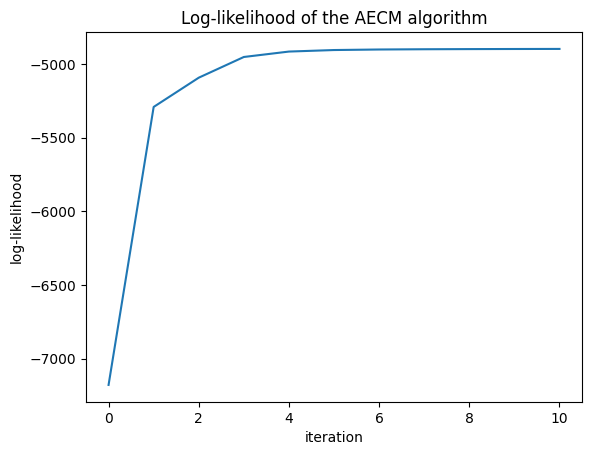

In [71]:
# Multivariate : GOD old
n = 1000
d = 4
n_clusters = 4
n_cat = 5

n_iter = 11
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = (np.random.random((n_clusters, d)) + 1)/2
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, seed=0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, model="god", init="random", n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

True alpha: [0.25 0.25 0.25 0.25], True mu: [[4 5 1 2]
 [4 1 1 2]
 [5 5 2 3]
 [5 3 5 4]], True pi: [[0.72172645 0.61478861 0.76720695 0.95698101]
 [0.7286024  0.71534928 0.96956389 0.88919462]
 [0.85798526 0.90137875 0.5464004  0.75907627]
 [0.93251013 0.91457345 0.91480168 0.63652499]]
Random initialization
--------------------
Initial mu: [[5 1 4 4]
 [4 2 4 3]
 [5 1 1 5]
 [3 2 1 2]]
Initial pi: [[0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832]]
Initial log likelihood: -7178.137141256473
Iteration 1
--------------------
Current mu: [[5 5 5 1]
 [5 3 5 3]
 [5 3 1 2]
 [4 5 1 2]]
Current pi: [[0.93392909 0.78520034 0.58164905 0.58296   ]
 [0.80999331 0.74417802 0.72214498 0.81367303]
 [0.77901469 0.64121545 0.57250411 0.77734371]
 [0.68230687 0.58234151 0.86636218 0.83675075]]
Current alpha: [0.07943503 0.17658159 0.39407381 0.34990957]
Log likelihood: 

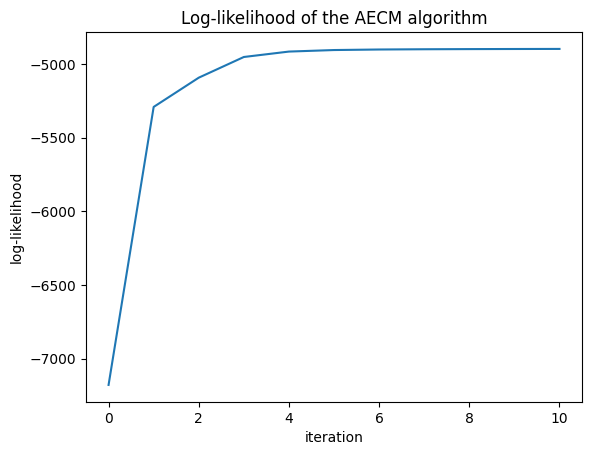

In [70]:
# Multivariate : GOD new
n = 1_000
d = 4
n_clusters = 4
n_cat = 5

n_iter = 10
# n_iter = 2
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = (np.random.random((n_clusters, d)) + 1)/2
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, seed=0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

# clustering = OrdinalClustering(n_clusters, model="god", init="random", n_iter=n_iter, eps=eps, silent=False)
clustering = AECM_GOD(nb_clusters=n_clusters,
                        nb_features=d,
                        ms=m,
                        data=data[0],
                        verbose=True)
ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter)


labels = clustering.labels

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        clustering.alphas, clustering.mus, clustering.pis
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.25
Estimated alpha: 0.14256773885601212
True mu: [4 5 1 2]
Estimated mu: [5 5 2 3]
True pi: [0.72172645 0.61478861 0.76720695 0.95698101]
Estimated pi: [0.89833462 0.93069456 0.52773074 0.83579866]
Cluster 1
True alpha: 0.25
Estimated alpha: 0.23064409912923295
True mu: [4 1 1 2]
Estimated mu: [5 3 5 4]
True pi: [0.7286024  0.71534928 0.96956389 0.88919462]
Estimated pi: [0.94757253 0.93926252 0.89754713 0.61269536]
Cluster 2
True alpha: 0.25
Estimated alpha: 0.18646931191716132
True mu: [5 5 2 3]
Estimated mu: [5 5 1 2]
True pi: [0.85798526 0.90137875 0.5464004  0.75907627]
Estimated pi: [0.71739267 0.7085746  0.57795141 0.76501626]
Cluster 3
True alpha: 0.25
Estimated alpha: 0.44031885009759353
True mu: [5 3 5 4]
Estimated mu: [4 1 1 2]
True pi: [0.93251013 0.91457345 0.91480168 0.63652499]
Estimated pi: [0.74875147 0.57728122 0.9240573  0.92239644]


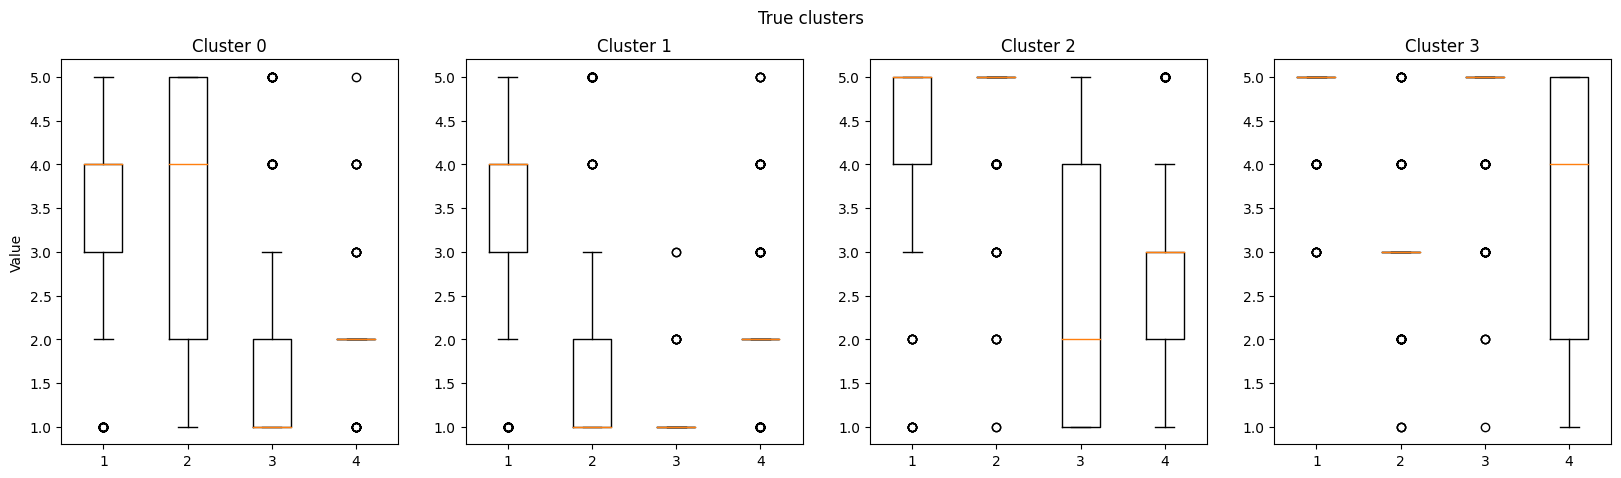

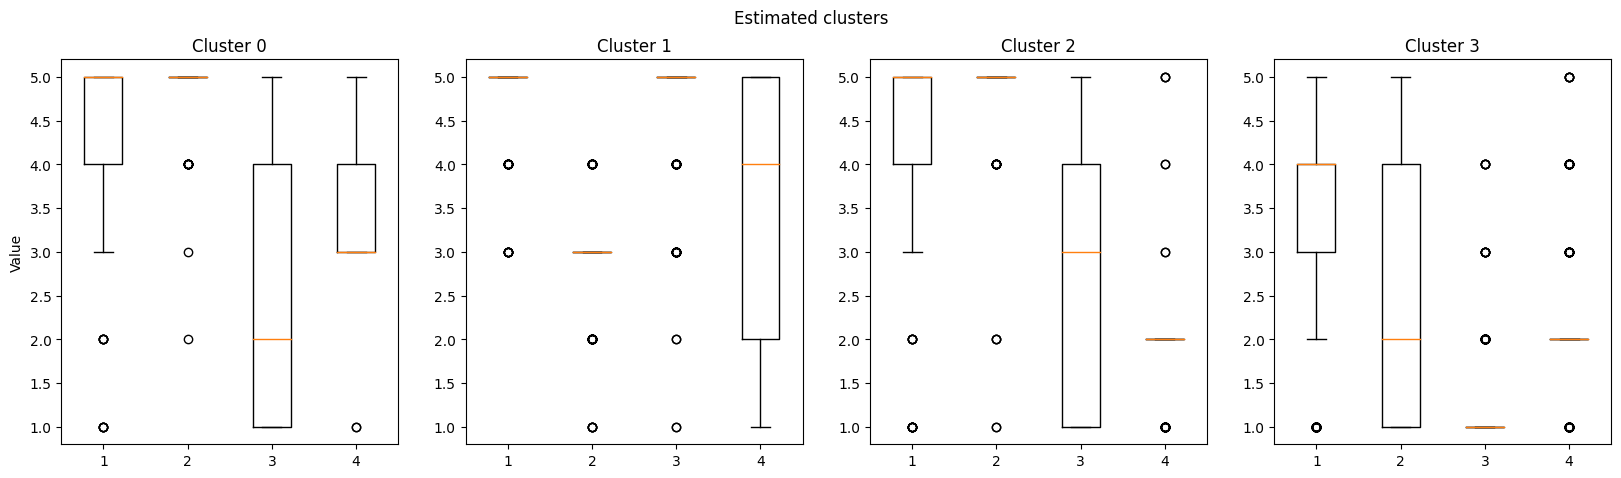

In [52]:
#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [56]:

# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

inits = ["random", "kmeans"]

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = (np.random.random((nc, dim)) + 1)/2 + 1e-3
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0, model="god")

                    clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god.csv", index=False)

1/32 done in 0.30s
Estimated time left: 9.29s
2/32 done in 0.55s
Estimated time left: 8.23s
3/32 done in 1.09s
Estimated time left: 10.58s
4/32 done in 1.64s
Estimated time left: 11.46s
5/32 done in 2.40s
Estimated time left: 12.95s
6/32 done in 2.81s
Estimated time left: 12.18s
7/32 done in 3.79s
Estimated time left: 13.54s
8/32 done in 4.72s
Estimated time left: 14.16s
9/32 done in 5.12s
Estimated time left: 13.09s
10/32 done in 5.52s
Estimated time left: 12.14s
11/32 done in 6.70s
Estimated time left: 12.79s
12/32 done in 7.63s
Estimated time left: 12.72s
13/32 done in 8.87s
Estimated time left: 12.96s
14/32 done in 9.54s
Estimated time left: 12.26s
15/32 done in 11.89s
Estimated time left: 13.47s
16/32 done in 13.82s
Estimated time left: 13.82s
17/32 done in 13.91s
Estimated time left: 12.27s
18/32 done in 13.98s
Estimated time left: 10.87s
19/32 done in 14.15s
Estimated time left: 9.68s
20/32 done in 14.49s
Estimated time left: 8.69s
21/32 done in 14.86s
Estimated time left: 7.78s

In [57]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_god", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\centering
\caption{Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_god}
\begin{tabular}{lllllrrr}
\toprule
       &     &   &   &   &  $\Delta \alpha$ &  $\Delta \mu$ &  $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &                  &               &               \\
\midrule
kmeans & 50  & 3 & 3 & 2 &            0.146 &         0.167 &         0.155 \\
       &     &   &   & 3 &            0.252 &         0.222 &         0.076 \\
       &     &   & 5 & 2 &            0.041 &         0.100 &         0.059 \\
       &     &   &   & 3 &            0.110 &         0.333 &         0.058 \\
       & 

/tmp/ipykernel_22975/2453373631.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(scores_short.to_latex(caption=caption, float_format="%.3f",


$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.145979      0.166667   
                              3                  0.251714      0.222222   
                          5   2                  0.041263      0.100000   
                              3                  0.109959      0.333333   
           5              3   2                  0.127968      0.666667   
                              3                  0.085306      0.444444   
                          5   2                  0.061091      0.300000   
                              3                  0.207314      0.400000   
       250 3              3   2                  0.176202      0.333333   
                              3                  0.146396      0.444444   
                          5   2                  0.082039      0.200000   
                              3                  0.072107      0.333333   
           5              3   2                  0.083852      0.666667   
                              3                  0.046850      0.555556   
                          5   2                  0.035026      0.400000   
                              3                  0.160104      0.400000   
random 50  3              3   2                  0.134507      0.166667   
                              3                  0.167524      0.333333   
                          5   2                  0.033174      0.100000   
                              3                  0.051005      0.133333   
           5              3   2                  0.102595      0.666667   
                              3                  0.177237      0.444444   
                          5   2                  0.053622      0.400000   
                              3                  0.111643      0.333333   
       250 3              3   2                  0.039864      0.166667   
                              3                  0.161784      0.222222   
                          5   2                  0.021742      0.200000   
                              3                  0.089880      0.200000   
           5              3   2                  0.072336      0.666667   
                              3                  0.127207      0.444444   
                          5   2                  0.059578      0.400000   
                              3                  0.122231      0.333333   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.154747  
                              3               0.075784  
                          5   2               0.058882  
                              3               0.058451  
           5              3   2               0.210839  
                              3               0.109065  
                          5   2               0.131089  
                              3               0.095473  
       250 3              3   2               0.161917  
                              3               0.064495  
                          5   2               0.067847  
                              3               0.065308  
           5              3   2               0.162481  
                              3               0.121578  
                          5   2               0.107500  
                              3               0.059479  
random 50  3              3   2               0.084612  
                              3               0.069040  
                          5   2               0.051498  
                              3               0.022844  
           5              3   2               0.172950  
                              3               0.089747  
                          5   2               0.089144  
                              3               0.073978  
       25

In [53]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

inits = ["random", "kmeans"]

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = (np.random.random((nc, dim)) + 1)/2 + 1e-3
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0, model="god")

                    # clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)
                    clustering = AECM_GOD(nb_clusters=nc,
                                          nb_features=dim,
                                          ms=m,
                                          data=data[0],
                                          verbose=False)

                    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization=init)
                    alpha_hat = clustering.alphas
                    mu_hat = clustering.mus
                    pi_hat = clustering.pis
                    labels = clustering.labels

                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god_v2.csv", index=False)

1/32 done in 0.10s
Estimated time left: 3.01s
2/32 done in 0.23s
Estimated time left: 3.38s
3/32 done in 0.46s
Estimated time left: 4.48s
4/32 done in 0.72s
Estimated time left: 5.01s
5/32 done in 0.95s
Estimated time left: 5.13s
6/32 done in 1.17s
Estimated time left: 5.08s
7/32 done in 1.50s
Estimated time left: 5.34s
8/32 done in 1.79s
Estimated time left: 5.36s
9/32 done in 1.97s
Estimated time left: 5.04s
10/32 done in 2.10s
Estimated time left: 4.61s
11/32 done in 2.46s
Estimated time left: 4.69s
12/32 done in 2.90s
Estimated time left: 4.83s
13/32 done in 3.26s
Estimated time left: 4.77s
14/32 done in 3.58s
Estimated time left: 4.60s
15/32 done in 4.17s
Estimated time left: 4.72s
16/32 done in 4.76s
Estimated time left: 4.76s
17/32 done in 4.83s
Estimated time left: 4.26s
18/32 done in 4.85s
Estimated time left: 3.78s
19/32 done in 4.93s
Estimated time left: 3.38s
20/32 done in 5.04s
Estimated time left: 3.03s
21/32 done in 5.20s
Estimated time left: 2.72s
22/32 done in 5.27s
Es

/media/DData/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  return pi ** (m - 1) * evaluate_polynomial(u[mu - 1, x - 1], (1 - pi) / pi)


In [55]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_god", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\centering
\caption{Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_god}
\begin{tabular}{lllllrrr}
\toprule
       &     &   &   &   &  $\Delta \alpha$ &  $\Delta \mu$ &  $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &                  &               &               \\
\midrule
kmeans & 50  & 3 & 3 & 2 &            0.146 &         0.167 &         0.155 \\
       &     &   &   & 3 &            0.250 &         0.222 &         0.079 \\
       &     &   & 5 & 2 &            0.043 &         0.100 &         0.063 \\
       &     &   &   & 3 &            0.113 &         0.333 &         0.061 \\
       & 

/tmp/ipykernel_22975/2453373631.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(scores_short.to_latex(caption=caption, float_format="%.3f",


$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.145979      0.166667   
                              3                  0.250131      0.222222   
                          5   2                  0.043397      0.100000   
                              3                  0.113067      0.333333   
           5              3   2                  0.127968      0.666667   
                              3                  0.064817      0.444444   
                          5   2                  0.096740      0.400000   
                              3                  0.187991      0.333333   
       250 3              3   2                  0.178709      0.333333   
                              3                  0.168590      0.444444   
                          5   2                  0.101150      0.200000   
                              3                  0.076452      0.333333   
           5              3   2                  0.075560      0.666667   
                              3                  0.136284      0.888889   
                          5   2                  0.045367      0.400000   
                              3                  0.162112      0.400000   
random 50  3              3   2                  0.057052      0.166667   
                              3                  0.140544      0.333333   
                          5   2                  0.039484      0.100000   
                              3                  0.045700      0.133333   
           5              3   2                  0.102598      0.666667   
                              3                  0.152794      0.444444   
                          5   2                  0.056628      0.400000   
                              3                  0.161602      0.200000   
       250 3              3   2                  0.039051      0.166667   
                              3                  0.156737      0.222222   
                          5   2                  0.030576      0.100000   
                              3                  0.086635      0.200000   
           5              3   2                  0.054716      0.666667   
                              3                  0.146495      0.444444   
                          5   2                  0.067474      0.400000   
                              3                  0.121292      0.333333   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.154558  
                              3               0.079417  
                          5   2               0.063102  
                              3               0.060651  
           5              3   2               0.210526  
                              3               0.112850  
                          5   2               0.131521  
                              3               0.173090  
       250 3              3   2               0.162376  
                              3               0.060244  
                          5   2               0.070002  
                              3               0.065281  
           5              3   2               0.167530  
                              3               0.123410  
                          5   2               0.102697  
                              3               0.054761  
random 50  3              3   2               0.092125  
                              3               0.058617  
                          5   2               0.051501  
                              3               0.022510  
           5              3   2               0.172925  
                              3               0.106536  
                          5   2               0.090260  
                              3               0.082425  
       25

## Choosing the correct number of clusters

### BOS

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]


  0%|          | 0/4 [00:00<?, ?it/s]

Estimated alpha: [0.77502843 0.22497157], Estimated mu: [[2 1 1]
 [1 2 1]], Estimated pi: [[0.71321424 0.27602583 0.97888148]
 [0.62186685 0.71243268 0.08382227]]
LL: -225.26722597481492
BIC: -241.38532162577323
Estimated alpha: [0.21763785 0.12215396 0.66020819], Estimated mu: [[1 2 1]
 [2 2 1]
 [2 1 1]], Estimated pi: [[0.80178891 0.7623055  0.42170427]
 [0.9050356  0.62136785 0.76127505]
 [0.72379254 0.35171556 0.9531913 ]]
LL: -221.95832308156446
BIC: -247.28675910449897
Estimated alpha: [0.26030842 0.15413949 0.56431837 0.02123372], Estimated mu: [[2 2 1]
 [1 2 1]
 [2 1 1]
 [3 1 3]], Estimated pi: [[0.63101004 0.60266347 0.84589423]
 [0.8364758  0.80367683 0.04799701]
 [0.71235401 0.44271192 0.99555289]
 [0.09174973 0.35635759 0.053485  ]]
LL: -222.61046113624076
BIC: -257.14923753115147
Estimated alpha: [0.29383398 0.08201926 0.49867724 0.07029092 0.0551786 ], Estimated mu: [[2 2 1]
 [1 2 1]
 [2 1 1]
 [2 1 1]
 [2 3 3]], Estimated pi: [[0.396525   0.77461439 0.79067708]
 [0.764683

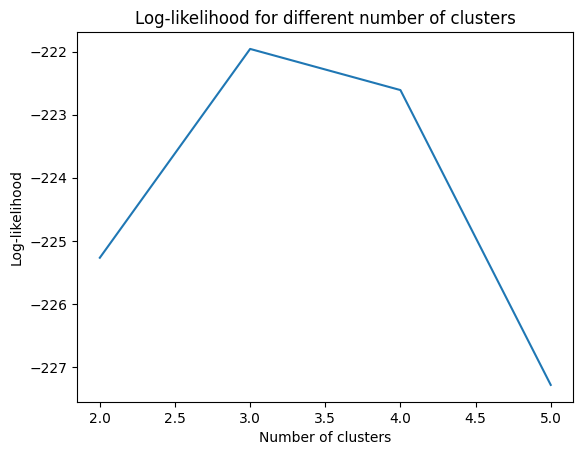

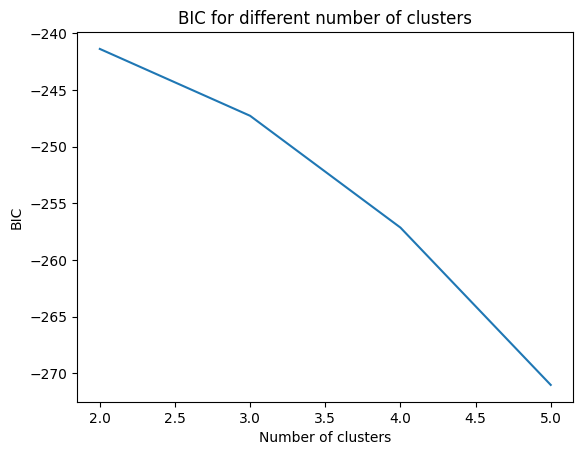

In [77]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="bos")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in tqdm(range(2, 6)):
    clustering = OrdinalClustering(n_clusters, model="bos", init="random", n_iter=n_iter, eps=eps, silent=True)

    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

    labels = clustering.labels_

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            alpha_hat, mu_hat, pi_hat
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]


  0%|          | 0/4 [00:00<?, ?it/s]

Estimated alpha: [0.57545122 0.42454878], Estimated mu: [[2 2 1]
 [2 1 1]], Estimated pi: [[0.61904463 0.31559352 0.91225177]
 [0.4084419  0.30455403 0.67099964]]
LL: -240.4804566753201
BIC: -256.5985523262784
Estimated alpha: [0.22271712 0.09569112 0.68159176], Estimated mu: [[1 2 1]
 [2 2 1]
 [2 1 1]], Estimated pi: [[0.78881027 0.74381562 0.43853387]
 [0.82240737 0.63641142 0.66111713]
 [0.74672924 0.34059312 0.95756521]]
LL: -222.3564867652226
BIC: -247.6849227881571
Estimated alpha: [0.25405846 0.1757756  0.3612135  0.20895244], Estimated mu: [[2 2 1]
 [1 2 1]
 [2 1 1]
 [2 1 1]], Estimated pi: [[0.37480714 0.68787296 0.67727857]
 [0.49314099 0.62879923 0.43609658]
 [0.75426577 0.21057894 0.98563843]
 [0.67294453 0.87884381 0.99752187]]
LL: -225.8072554173887
BIC: -260.3460318122994
Estimated alpha: [0.24719562 0.12696793 0.16450179 0.08901776 0.3723169 ], Estimated mu: [[1 2 1]
 [2 1 1]
 [2 2 1]
 [2 1 1]
 [2 1 1]], Estimated pi: [[0.63292584 0.81880481 0.45602893]
 [0.64457736 0.2

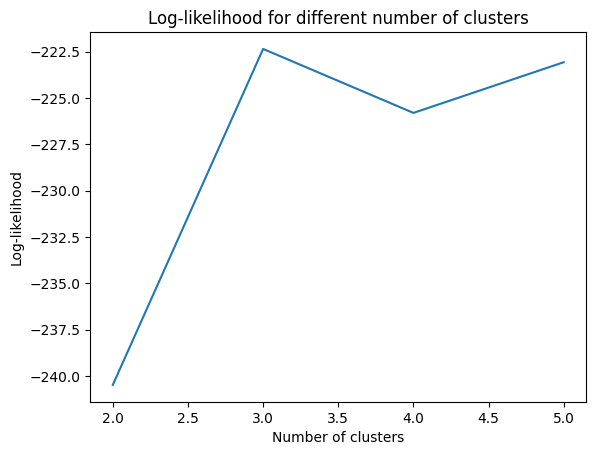

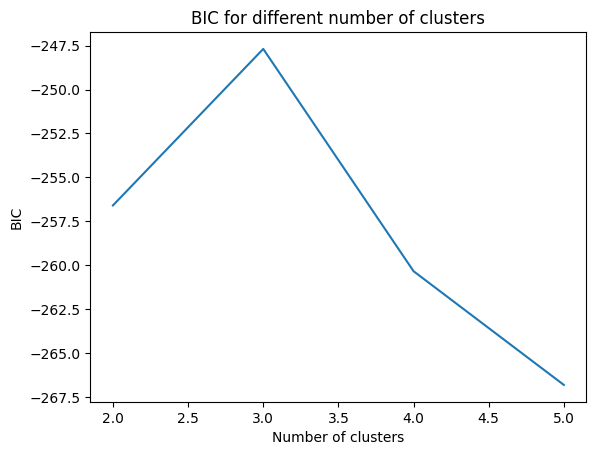

In [78]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="bos")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in tqdm(range(2, 6)):
    # clustering = OrdinalClustering(n_clusters, model="bos", init="random", n_iter=n_iter, eps=eps, silent=True)
    clustering = AECM_BOS(nb_clusters=n_clusters,
                          nb_features=d,
                          ms=m,
                          data=data[0],
                          verbose=False)

    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization="random")

    labels = clustering.labels

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            clustering.alphas, clustering.mus, clustering.pis
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

### GOD

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]
Estimated alpha: [0.34418282 0.65581718], Estimated mu: [[2 2 1]
 [2 1 1]], Estimated pi: [[0.79626242 0.6663046  0.55796314]
 [0.60717688 0.67256582 0.94982232]]
LL: -282.37484738099687
BIC: -298.4929430319552
Estimated alpha: [0.30898989 0.50321608 0.18779403], Estimated mu: [[2 2 1]
 [2 1 1]
 [1 3 1]], Estimated pi: [[0.89427622 0.72197044 0.62556174]
 [0.6144132  0.72085962 0.97115974]
 [0.86453063 0.53373573 0.71516212]]
LL: -278.51331802937074
BIC: -303.84175405230525
Estimated alpha: [0.15378393 0.53167685 0.18125975 0.13327947], Estimated mu: [[2 2 3]
 [2 1 1]
 [2 2 1]
 [1 3 1]], Estimated pi: [[0.95866621 0.64775021 0.66223616]
 [0.59907946 0.73695702 0.95954738]
 [0.8398444  0.80288293 0.92524017]
 [0.9999956  0.63716394 0.62934421]]
LL: -276.59818288196726
BIC: -311.13695927

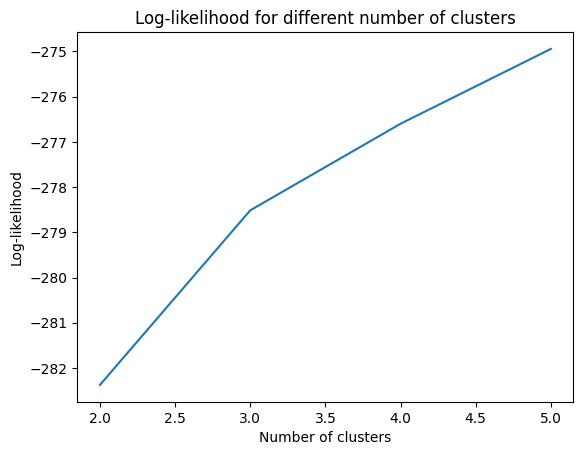

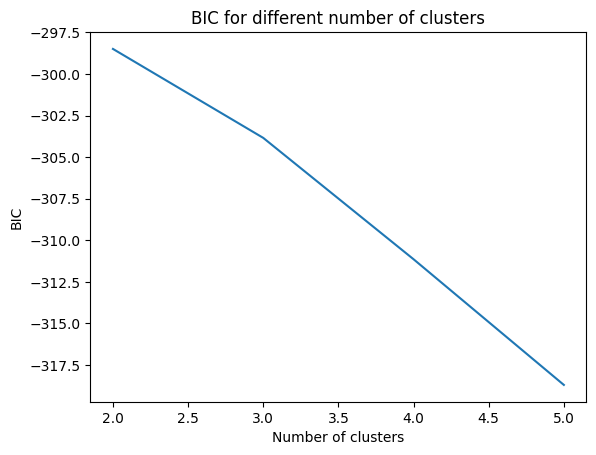

In [72]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in range(2, 6):
    clustering = OrdinalClustering(n_clusters, model="god", init="kmeans", n_iter=n_iter, eps=eps, silent=True)

    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

    labels = clustering.labels_

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            alpha_hat, mu_hat, pi_hat
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]
Estimated alpha: [0.34420876 0.65579124], Estimated mu: [[2 2 1]
 [2 1 1]], Estimated pi: [[0.79617428 0.66617019 0.55802941]
 [0.60717425 0.67276226 0.94972923]]
LL: -282.33674319206364, -282.33674319206364
BIC: -298.45483884302195
Estimated alpha: [0.30898623 0.5032032  0.18781057], Estimated mu: [[2 2 1]
 [2 1 1]
 [1 3 1]], Estimated pi: [[0.89422033 0.72214498 0.62559372]
 [0.61461979 0.72098531 0.9709852 ]
 [0.86436992 0.53357728 0.71546573]]
LL: -278.2509787469237, -278.2509787469237
BIC: -303.5794147698582
Estimated alpha: [0.15376129 0.53160581 0.18129725 0.13333565], Estimated mu: [[2 2 3]
 [2 1 1]
 [2 2 1]
 [1 3 1]], Estimated pi: [[0.95853547 0.6477319  0.6620162 ]
 [0.59891606 0.73713302 0.95945429]
 [0.83990469 0.80298511 0.92531938]
 [0.99961939 0.63715103 0.62950761]]
LL

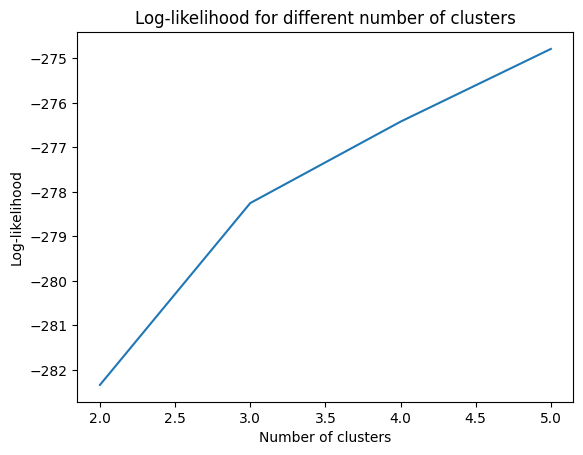

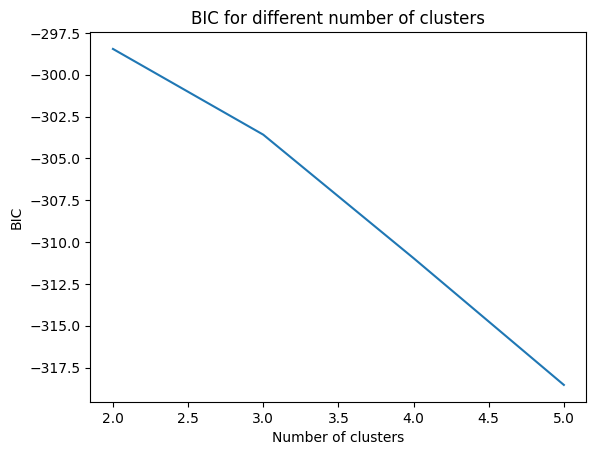

In [74]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in range(2, 6):
    # clustering = OrdinalClustering(n_clusters, model="god", init="kmeans", n_iter=n_iter, eps=eps, silent=True)
    clustering = AECM_GOD(nb_clusters=n_clusters,
                          nb_features=d,
                          ms=m,
                          data=data[0],
                          verbose=False)

    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization="kmeans")

    labels = clustering.labels

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            clustering.alphas, clustering.mus, clustering.pis
        )
    )
    print(f"LL: {ll_list[-1]}, {clustering.log_likelihood}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()